# This Notebook starts from Preprocessed Dataframework. "df_spark.csv" is the dataframe

In [ ]:
import pandas as pd

In [ ]:
df_spark = pd.read_csv('df_spark.csv')

In [ ]:
df_spark.head()

In [ ]:
df_spark = df_spark.drop(columns="Unnamed: 0")

In [ ]:
df_spark.head()

# In the following code X contains features and y contains label

In [ ]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

# The whole dataset is split into 80:20 ratio. X_train contains 80% of the features, X_test contains 20% of the features and y_train contains 80% corresponding label of X_train and y_test contains 20% corresponding label of X_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# 5-Fold Cross validation Estimation for Logistic Regression

In [9]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [10]:
for i in train_sizes:
    print(i)

57270
114540
171811
229081
286352


In [11]:
for i in train_mean:
    print(i)

0.9864361795006111
0.986911122751877
0.9868308781160694
0.9865846578284538
0.9883150807397888


In [ ]:
for i in test_mean:
    print(i)

# 5-Fold Cross validation Estimation for Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

In [ ]:
for i in train_mean_tree:
    print(i)

In [ ]:
for i in test_mean_tree:
    print(i)

# 5-Fold Cross validation Estimation for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

In [ ]:
for i in train_mean_rnd:
    print(i)

In [ ]:
for i in test_mean_rnd:
    print(i)

# Mean values of Training and Testing accuracies and Standard Deviation of Training and Testing accuracies are given below

In [ ]:
np.mean(train_mean) , np.mean(train_mean_tree), np.mean(train_mean_rnd)

In [ ]:
np.mean(train_std) , np.mean(train_std_tree), np.mean(train_std_rnd)

In [ ]:
np.mean(test_mean) , np.mean(test_mean_tree), np.mean(test_mean_rnd)

In [ ]:
np.mean(test_std) ,np.mean(test_std_tree), np.mean(test_std_rnd)

# Evaluation Metrics Calculations for Logisitic Regression

In [ ]:
pipe_lr = pipe_lr.fit(X_train, y_train)

In [ ]:
y_pred_train = pipe_lr.predict(X_train)

In [ ]:
y_pred_test = pipe_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train, y_pred_train)

In [ ]:
accuracy_score(y_test, y_pred_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

In [ ]:
for i in cnf_matrix:
    for j in i:
        print(j, end='&')
    print()

In [12]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [15]:
y_pred = nb_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.018117308525052733

In [17]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.018117314996635124

In [36]:
report = classification_report(y_test, nb_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

         0.0       0.02      1.00      0.03      1178
         1.0       0.00      0.00      0.00        63
         2.0       0.00      0.00      0.00       169
         3.0       0.00      0.00      0.00       155
         4.0       0.00      0.00      0.00       305
         5.0       0.00      0.00      0.00       120
         6.0       0.00      0.00      0.00        28
         7.0       1.00      0.00      0.00     69571

    accuracy                           0.02     71589
   macro avg       0.13      0.13      0.00     71589
weighted avg       0.97      0.02      0.00     71589



C:\Users\metec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [19]:
y_pred = knn_model.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.9937001494643032

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      1178
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00       169
         3.0       1.00      1.00      1.00       155
         4.0       0.98      1.00      0.99       305
         5.0       1.00      1.00      1.00       120
         6.0       1.00      1.00      1.00        28
         7.0       1.00      0.99      1.00     69571

    accuracy                           0.99     71589
   macro avg       0.96      1.00      0.98     71589
weighted avg       1.00      0.99      0.99     71589



In [22]:
from xgboost import XGBClassifier

In [23]:
xgb_model = XGBClassifier().fit(X_train, y_train)

C:\Users\metec\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9943706435346212

In [35]:
report = classification_report(y_test, xgb_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79      1178
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00       169
         3.0       1.00      1.00      1.00       155
         4.0       1.00      1.00      1.00       305
         5.0       1.00      1.00      1.00       120
         6.0       1.00      1.00      1.00        28
         7.0       0.99      1.00      1.00     69571

    accuracy                           0.99     71589
   macro avg       1.00      0.96      0.97     71589
weighted avg       0.99      0.99      0.99     71589



# # CatBoost

In [25]:

from catboost import CatBoostClassifier

In [31]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.105591
0:	learn: 1.4136248	total: 421ms	remaining: 7m
1:	learn: 1.1192666	total: 568ms	remaining: 4m 43s
2:	learn: 0.9256429	total: 731ms	remaining: 4m 2s
3:	learn: 0.7824008	total: 901ms	remaining: 3m 44s
4:	learn: 0.6726744	total: 1.07s	remaining: 3m 32s
5:	learn: 0.5856969	total: 1.22s	remaining: 3m 21s
6:	learn: 0.5141976	total: 1.37s	remaining: 3m 14s
7:	learn: 0.4544402	total: 1.53s	remaining: 3m 9s
8:	learn: 0.3992564	total: 1.7s	remaining: 3m 7s
9:	learn: 0.3534927	total: 1.87s	remaining: 3m 4s
10:	learn: 0.3161163	total: 2.05s	remaining: 3m 4s
11:	learn: 0.2842506	total: 2.21s	remaining: 3m 1s
12:	learn: 0.2546462	total: 2.4s	remaining: 3m 2s
13:	learn: 0.2299275	total: 2.58s	remaining: 3m 1s
14:	learn: 0.2062595	total: 2.79s	remaining: 3m 3s
15:	learn: 0.1867672	total: 2.98s	remaining: 3m 3s
16:	learn: 0.1705821	total: 3.14s	remaining: 3m 1s
17:	learn: 0.1546674	total: 3.34s	remaining: 3m 2s
18:	learn: 0.1410633	total: 3.51s	remaining: 3m 1s
19:	learn: 

In [32]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9943566749081563

In [34]:
report = classification_report(y_test, cat_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79      1178
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00       169
         3.0       1.00      1.00      1.00       155
         4.0       1.00      1.00      1.00       305
         5.0       1.00      1.00      1.00       120
         6.0       1.00      1.00      1.00        28
         7.0       0.99      1.00      1.00     69571

    accuracy                           0.99     71589
   macro avg       1.00      0.96      0.97     71589
weighted avg       0.99      0.99      0.99     71589



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [39]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9942588945229016

In [ ]:
report = classification_report(y_test, gbm_model.predict(X_test))
print(report)

In [10]:


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pipe_svc =SVC().fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)


In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)
print(classification_report(y_train, y_pred_train, target_names=target_names))

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

NameError: name 'X_train' is not defined

In [ ]:
y_pred = loj_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
accuracy_score(y_test, y_pred)

In [2]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [ ]:
cart_model

In [ ]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
report = classification_report(y_test, cart_model.predict(X_test))
print(report)

In [32]:
modeller = [
    gbm_model,
    knn_model,
    svm_model,
    nb_model,
    cart_model
    xgb_model,
    loj_model,
    cat_model,
    mlpc
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
GradientBoostingClassifier:
Accuracy: 99.4259%
----------------------------
KNeighborsClassifier:
Accuracy: 99.3700%
----------------------------
GaussianNB:
Accuracy: 1.8117%
----------------------------
XGBClassifier:
Accuracy: 99.4371%


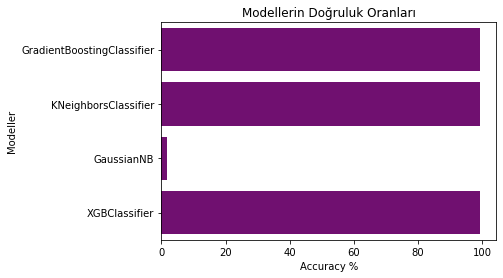

In [35]:
import seaborn as sns
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":[0.9426983403065574,0.9574115458084643,0.8198176386217473,0.784126066638906], "ML Models":["DecisionTreeClassifier","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

LogisticRegression(solver='liblinear')

[[    0     0     0     0     0     0     0  1178]
 [    0     0     0     0     0     0     0    63]
 [    0     0     0     0     0     0     0   169]
 [    0     0     0     0     0     0     0   155]
 [    0     0     0     0     0     0     0   305]
 [    0     0     0     0     0     0     0   120]
 [    0     0     0     0     0     0     0    28]
 [    0     0     0     0     0     0     0 69571]]


0.9718113117937113

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1178
         1.0       0.00      0.00      0.00        63
         2.0       0.00      0.00      0.00       169
         3.0       0.00      0.00      0.00       155
         4.0       0.00      0.00      0.00       305
         5.0       0.00      0.00      0.00       120
         6.0       0.00      0.00      0.00        28
         7.0       0.97      1.00      0.99     69571

    accuracy                           0.97     71589
   macro avg       0.12      0.12      0.12     71589
weighted avg       0.94      0.97      0.96     71589



C:\Users\metec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
#comparing accuracies
import seaborn as sns
plt.figure(figsize=(4,4))
ac = [gbm_model,
    knn_model,
    
    nb_model,
    
    xgb_model]
name = ["gbm_model",
   " knn_model",
    
    "nb_model",
    
   " xgb_model"]
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 288x288 with 0 Axes>

# Evaluation Metrics Calculations for Decision Tree

In [ ]:
pipe_tree = pipe_tree.fit(X_train, y_train)
y_pred_train = pipe_tree.predict(X_train)
y_pred_test = pipe_tree.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
for i in cnf_matrix:
    for j in i:
        print(j, end='&')
    print()

# Evaluation Metrics Calculations for Random Forest

In [ ]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [ ]:
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
for i in cnf_matrix:
    for j in i:
        print(j, end='&')
    print()

In [ ]:
bu notebooku komple sil zaten ben bu notebookun yerine yaptım benimkini erkan baba sana bii göstercem